In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from coupling_plot_utils import *
%matplotlib inline

In [2]:
ecog_path = 'fits/ecog/ecog_HG.h5'

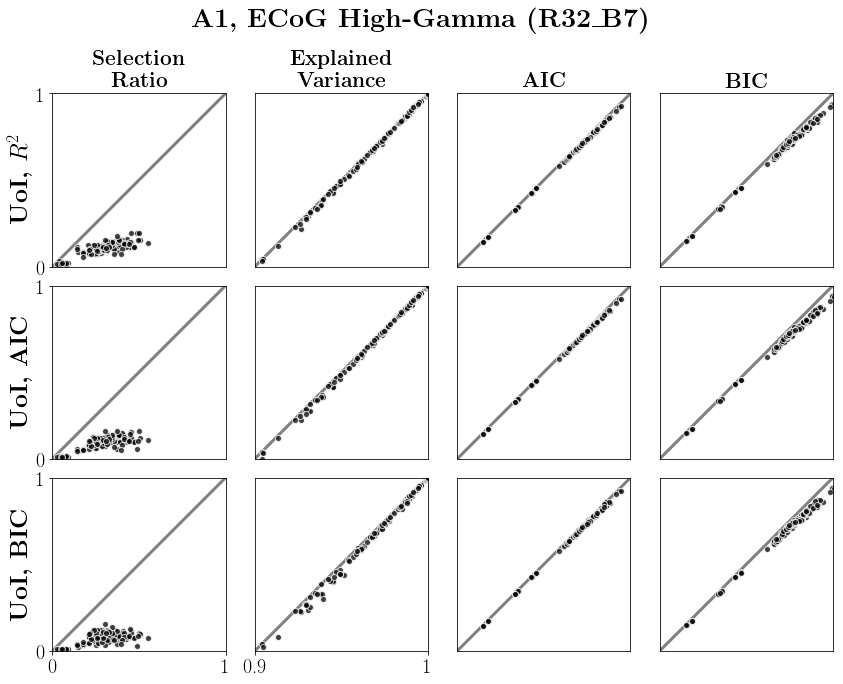

In [11]:
axes = plot_coupling_grid(fits_path=ecog_path)

# additional customizations

# selection ratio + explained variance unity lines
for idx in range(3):
    axes[idx, 0].plot([0, 1], [0, 1], color='gray', linewidth=3, zorder=-1)
    axes[idx, 1].set_xlim([0.9, 1])
    axes[idx, 1].set_ylim([0.9, 1])
    axes[idx, 1].plot([0.9, 1], [0.9, 1], color='gray', linewidth=3, zorder=-1)
    axes[idx, 1].set_aspect('equal')
    axes[idx, 0].set_xticks([])
    axes[idx, 0].set_yticks([0, 1])
    axes[idx, 1].set_xticks([])
    axes[idx, 1].set_yticks([])

# AIC axes
for idx in range(3):
    axes[idx, 2].plot([-4000, 0], [-4000, 0], color='gray', linewidth=3, zorder=-1)
    axes[idx, 2].set_xlim([-4000, 0])
    axes[idx, 2].set_ylim([-4000, 0])
    axes[idx, 2].set_aspect('equal')
    axes[idx, 2].set_xticks([])
    axes[idx, 2].set_yticks([])

# BIC axes
for idx in range(3):
    axes[idx, 3].plot([-4000, 0], [-4000, 0], color='gray', linewidth=3, zorder=-1)
    axes[idx, 3].set_xlim([-4000, 0])
    axes[idx, 3].set_ylim([-4000, 0])
    axes[idx, 3].set_aspect('equal')
    axes[idx, 3].set_xticks([])
    axes[idx, 3].set_yticks([])

# labels for selection ratio and explained variance
axes[2, 0].set_xticks([0, 1])
axes[2, 0].set_xticklabels([0, 1])
axes[2, 1].set_xticks([0.9, 1])
axes[2, 1].set_xticklabels([0.9, 1])

plt.gcf().text(
    x=0.5, y=1.03,
    s=r'\textbf{A1, ECoG High-Gamma (R32\_B7)}',
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=27
)
plt.tight_layout(h_pad=0., w_pad=0.)
plt.savefig('ecog_HG.pdf', bbox_inches='tight')